In [1]:
!pip install sweetviz
!pip install plotnine
!pip install autoviz
!pip install xlrd
!pip install wordcloud
!pip install autoviz
!pip install category_encoders

  Using cached sweetviz-2.1.3-py3-none-any.whl (15.1 MB)
  Using cached plotnine-0.8.0-py3-none-any.whl (4.7 MB)
  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
  Using cached mizani-0.7.3-py3-none-any.whl (63 kB)
  Using cached statsmodels-0.12.2-cp36-none-win_amd64.whl (9.3 MB)
  Using cached palettable-3.3.0-py2.py3-none-any.whl (111 kB)


Shape of your Data Set loaded: (891, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  2
    Number of Columns to Delete =  0
    11 Predictors classified...
        This does not include the Target column(s)
        4 variables removed since they were ID or low-information variables

################ Binary_Classification VISUALIZATION Started #####################


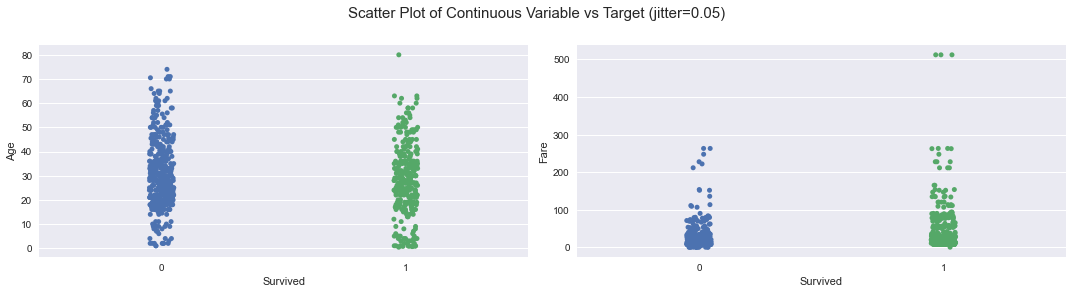

Total Number of Scatter Plots = 3


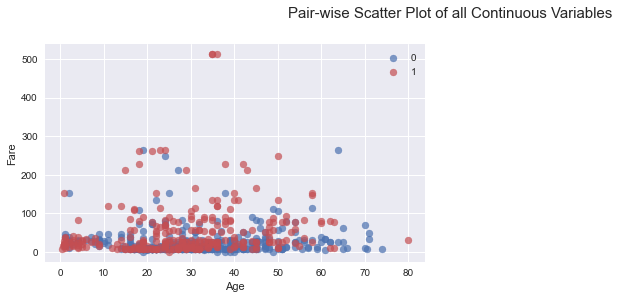

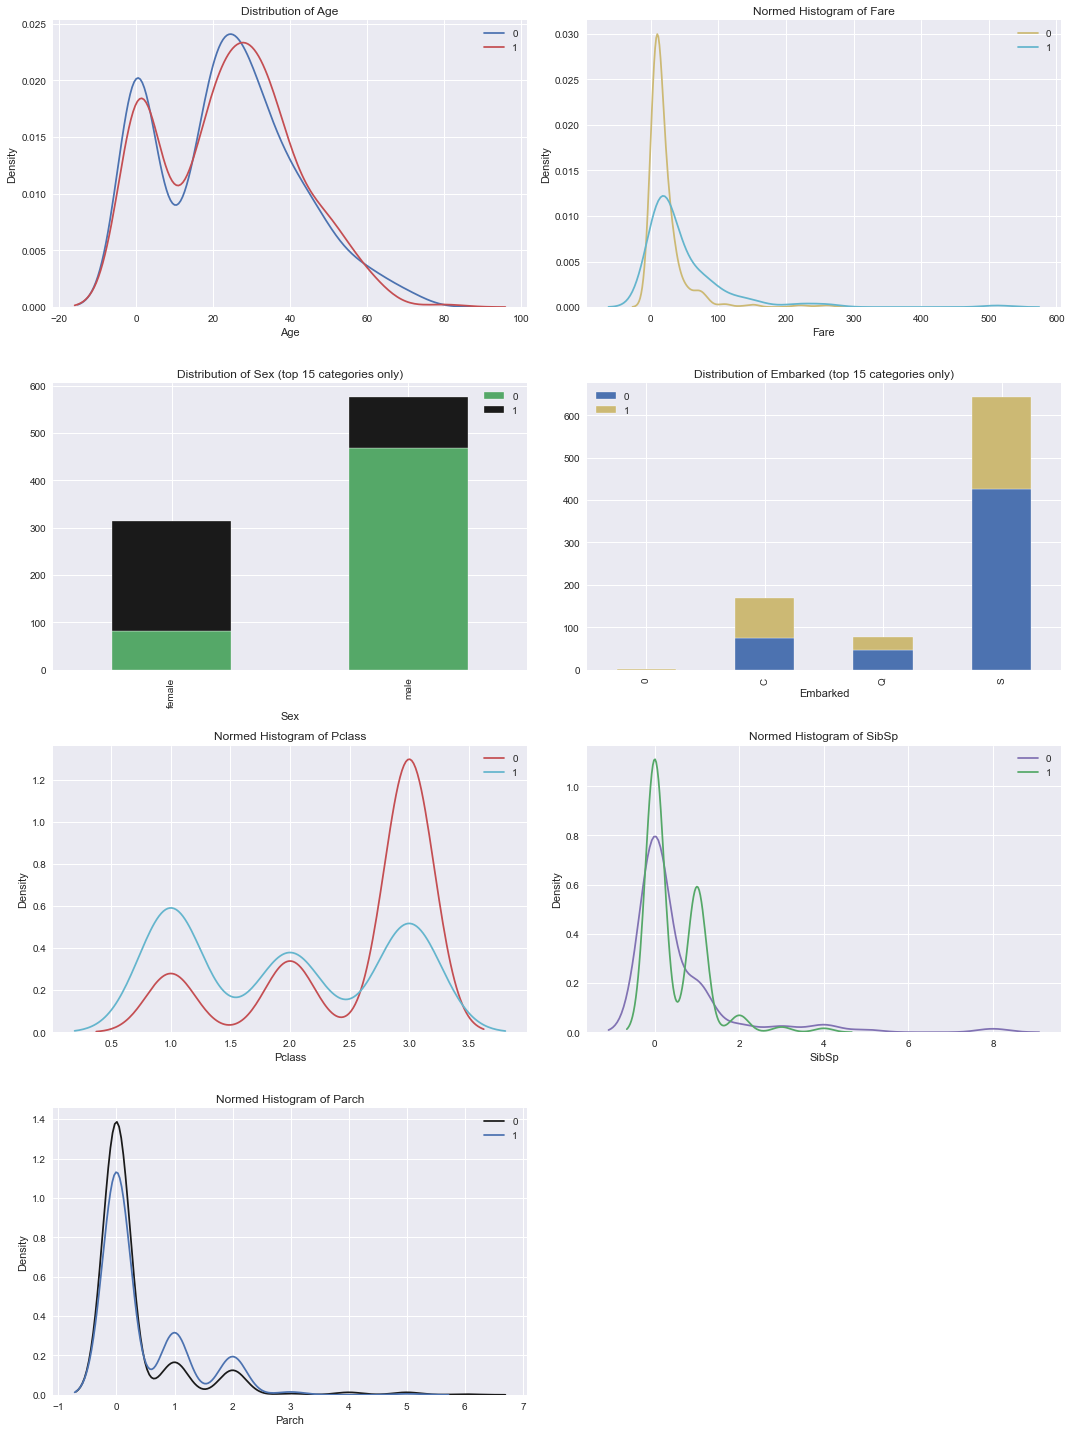

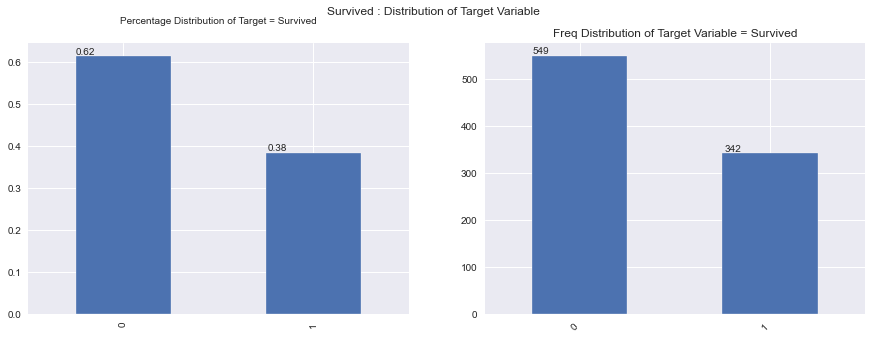

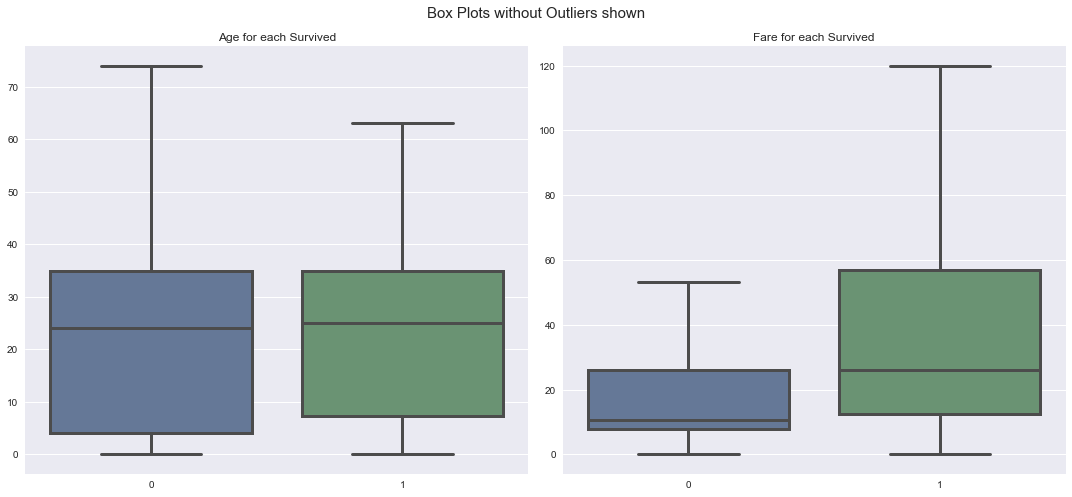

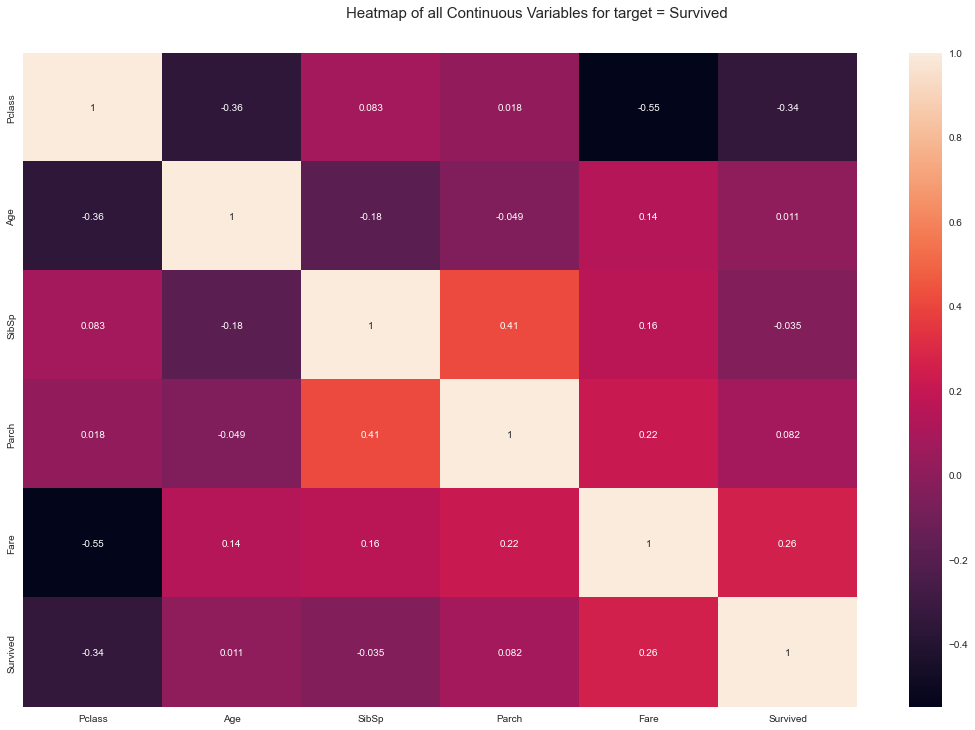

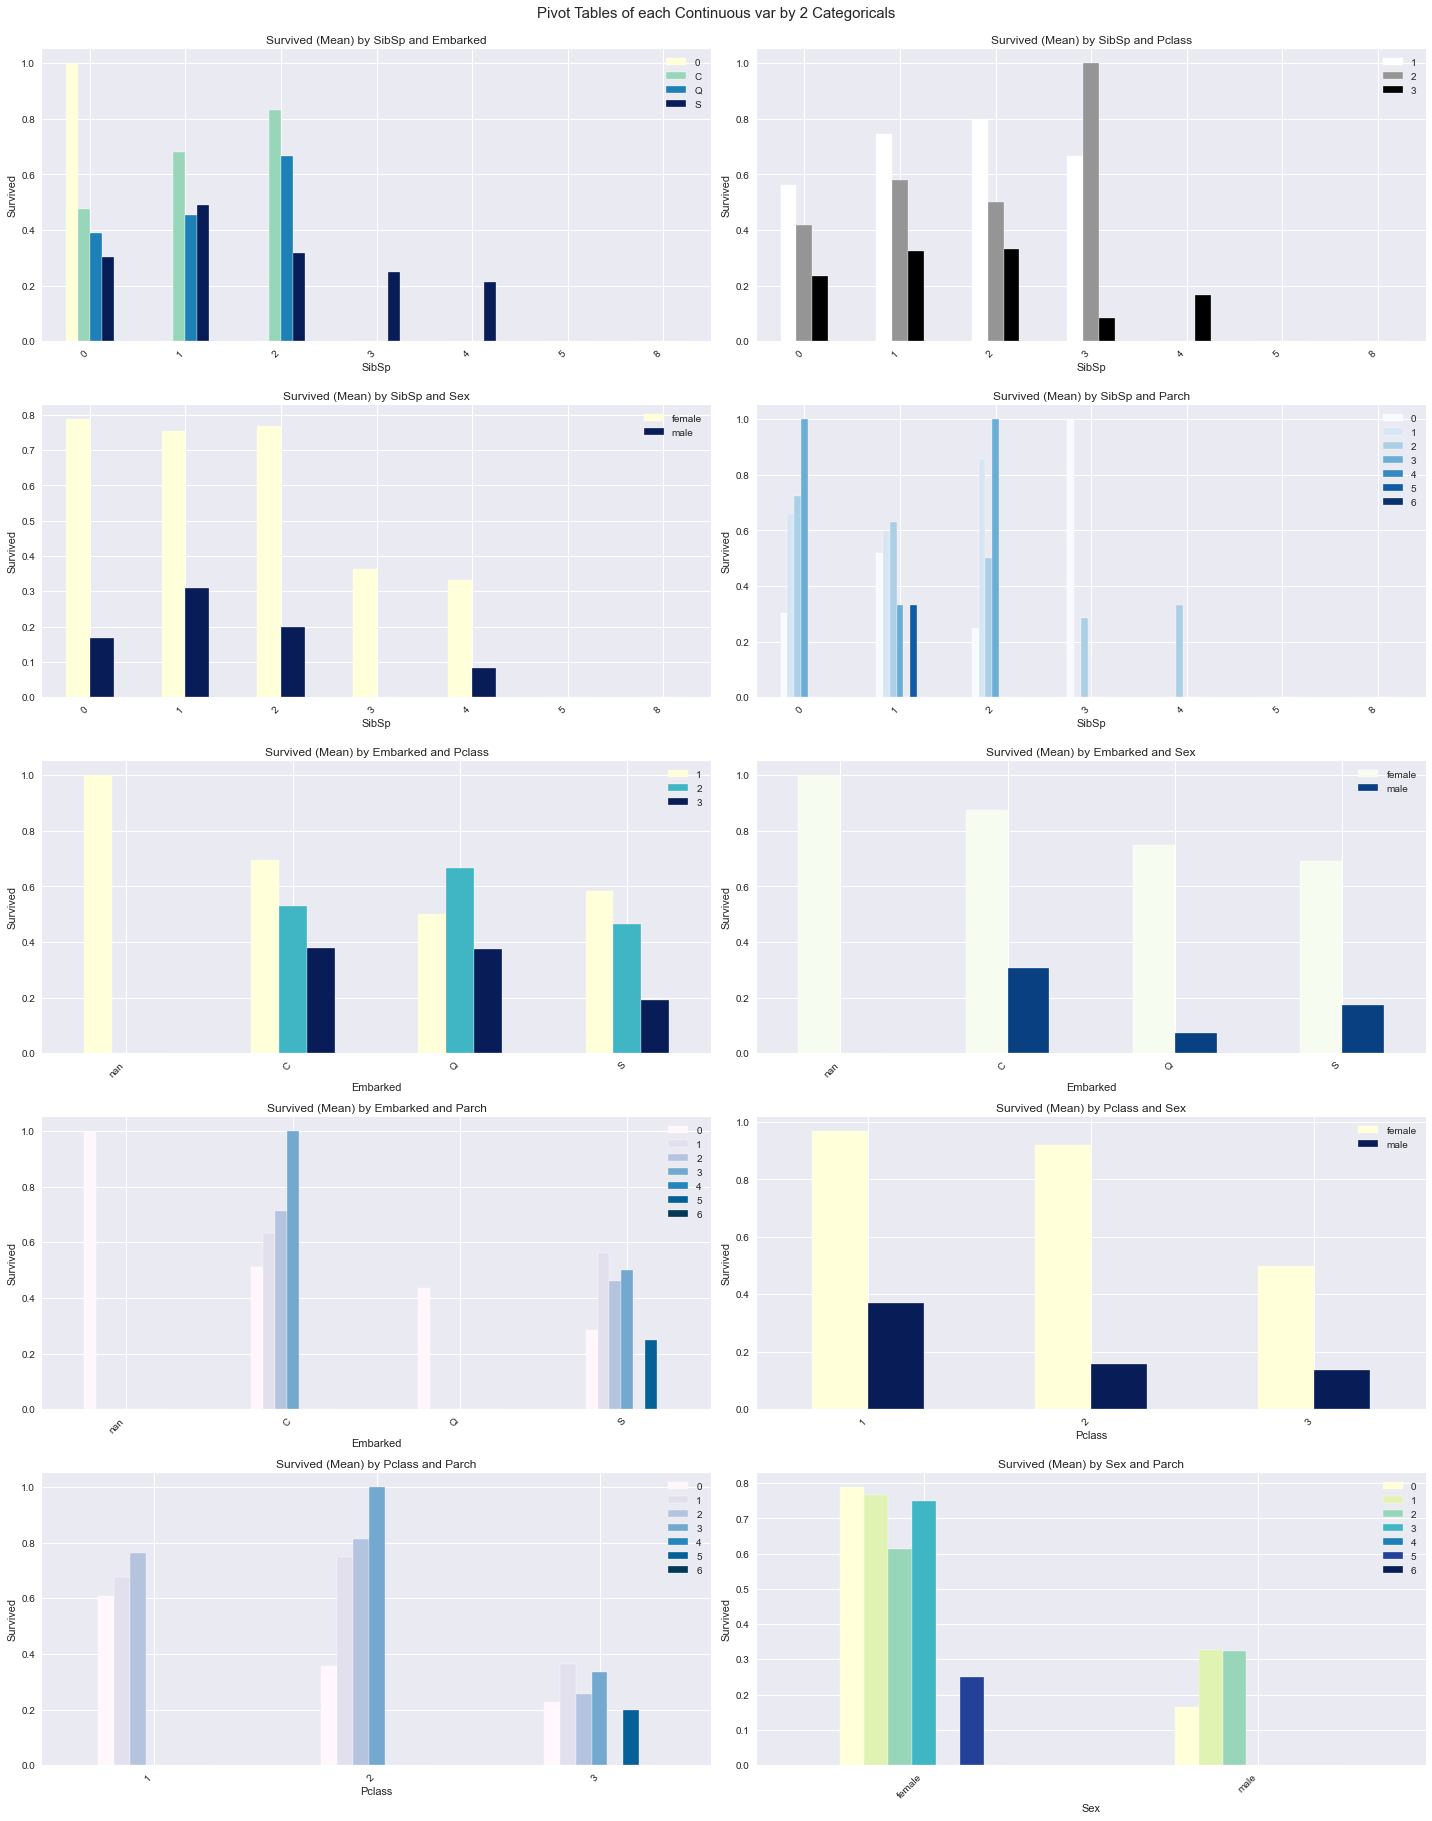

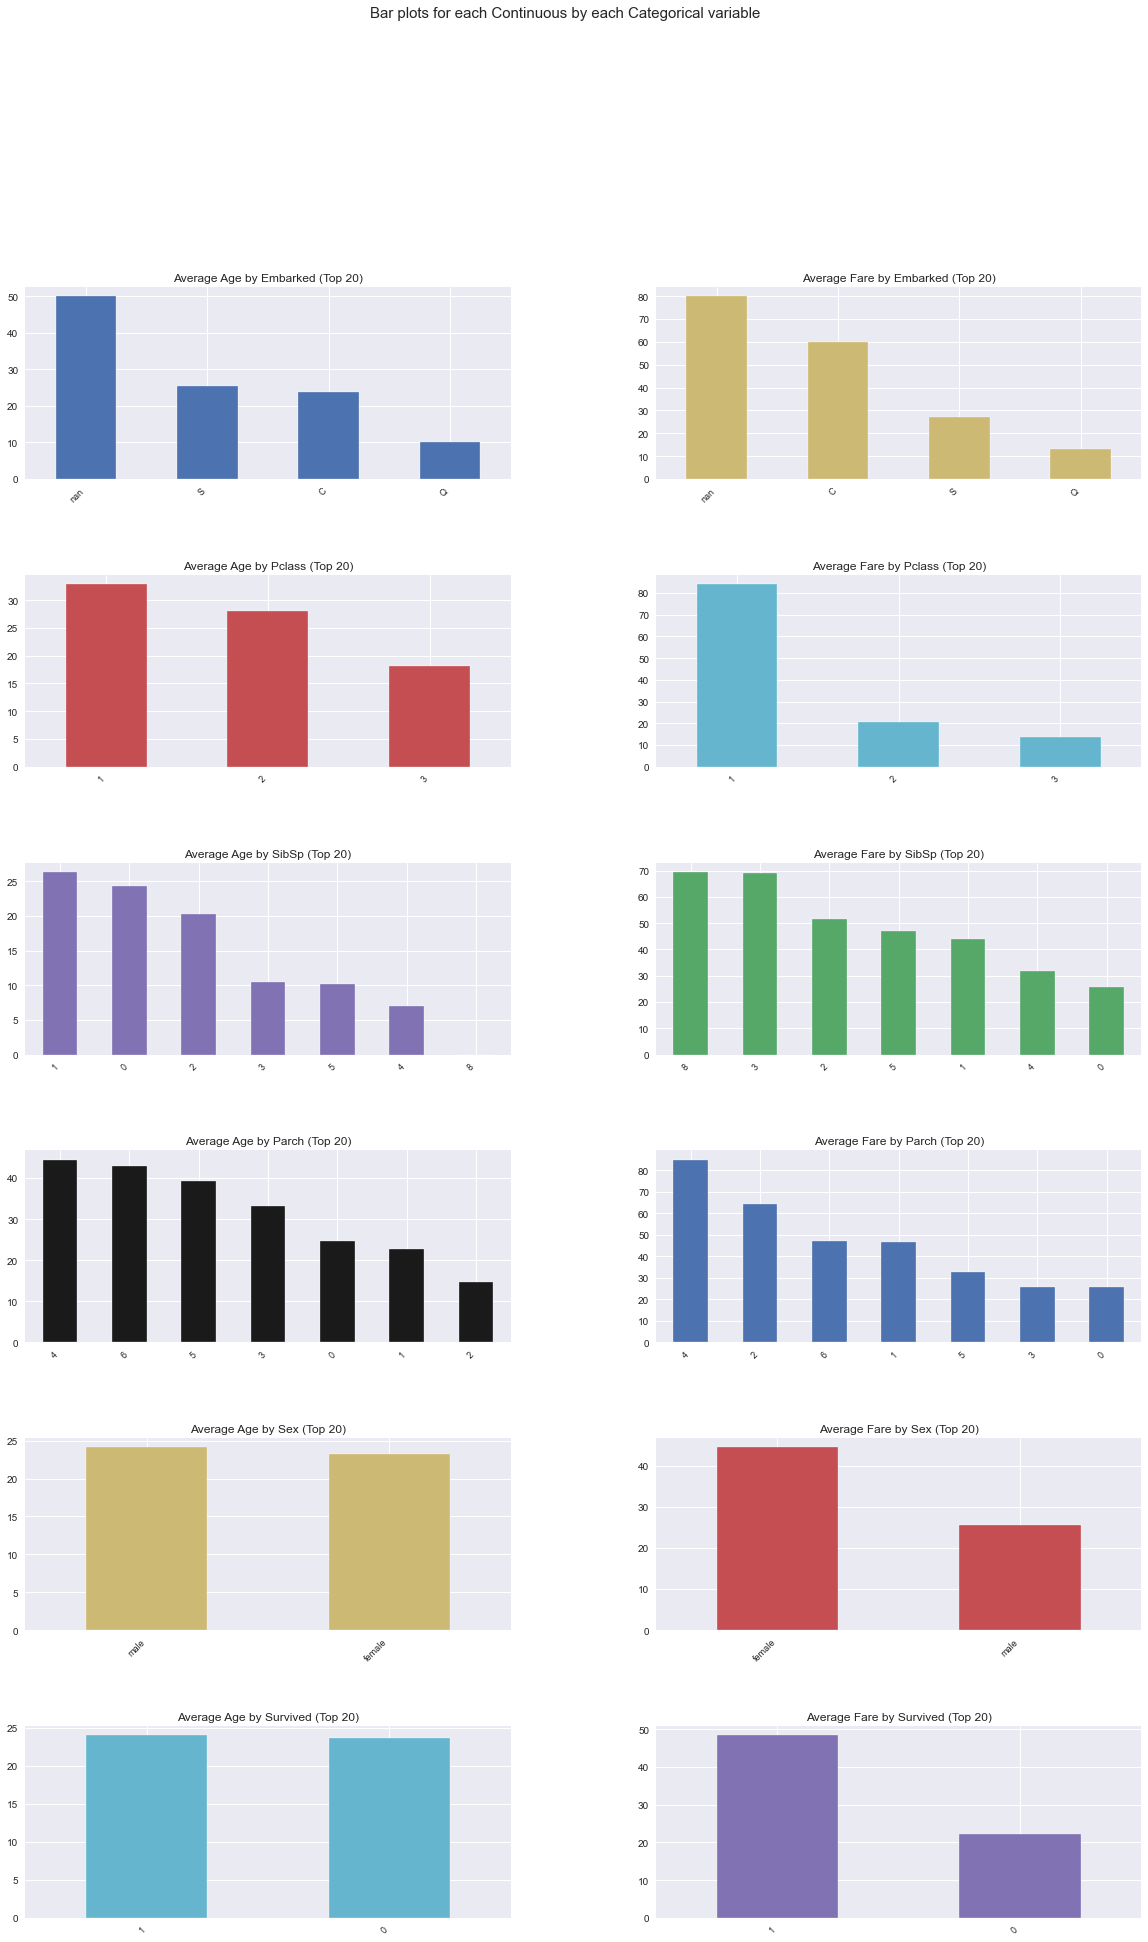

Time to run AutoViz (in seconds) = 8.868

 ###################### VISUALIZATION Completed ########################


In [40]:

from autoviz.AutoViz_Class import AutoViz_Class
 
AV = AutoViz_Class()
df = AV.AutoViz('./data/train.csv', depVar='Survived')

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
df_train.groupby('Sex').Age.mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [56]:
df_train[df_train.Age.isnull()].Pclass.value_counts(normalize=True)

3    0.768362
1    0.169492
2    0.062147
Name: Pclass, dtype: float64

In [4]:
import pandas as pd
import numpy as np
import sweetviz as sv
import plotnine as pn

In [106]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
df_gender = pd.read_csv('./data/gender_submission.csv')

In [107]:
report = sv.analyze(df_train, target_feat='Survived')
report.show_html(
    filepath = 'sweetviz/report1.html'
)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweetviz/report1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [108]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [109]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [110]:
import sys
!{sys.executable} -m pip install pycaret

'C:\Users\Mohammad' is not recognized as an internal or external command,
operable program or batch file.


In [111]:
df_train.drop(columns=[ 'PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True )


In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [112]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  #instantiate the Label Encoder
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_train['Embarked'] = le.fit_transform(df_train['Embarked'])
df_train.Age.fillna(30, inplace=True)


In [94]:
!pip install category_encoders

  Using cached category_encoders-2.3.0-py2.py3-none-any.whl (82 kB)


In [142]:
import category_encoders as ce
ce_one = ce.OneHotEncoder(cols=['Embarked', 'Pclass']) 

df_train = ce_one.fit_transform(df_train)

In [143]:
from sklearn.model_selection import train_test_split
X = df_train.drop(columns='Survived')
y = df_train[['Survived']]


In [144]:
X_train, X_test, y_train, y_test = train_test_split(
                         X, y, test_size=0.20, random_state=42)

In [140]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712, 1), (179, 1))

## Using the label hot encoding with logistic regression

In [116]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import f1_score
# from sklearn.metrics import confusion_matrix
# Logistic_regression_model = LogisticRegression()
# Logistic_regression_model.fit(X_train, y_train)
# Logistic_regression_predictions = Logistic_regression_model.predict(X_test)

# print(f1_score(y_test, Logistic_regression_predictions, average='binary'))

# confusion_matrix(y_test, Logistic_regression_predictions)

#using label encoder

0.7638888888888888


array([[90, 15],
       [19, 55]], dtype=int64)

## Using the one hot encoding with logistic regression

In [164]:
#using one hot encoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
Logistic_regression_model = LogisticRegression()
Logistic_regression_model.fit(X_train, y_train)
Logistic_regression_predictions = Logistic_regression_model.predict(X_test)

print('f1_score = {}'.format(f1_score(y_test, Logistic_regression_predictions, average='binary')))

confusion_matrix(y_test, Logistic_regression_predictions)

f1_score = 0.7464788732394366


array([[90, 15],
       [21, 53]], dtype=int64)

## Using the label encoding with Randomforest

In [163]:
#using label encoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# X_train, y_train = make_classification(n_samples=1000, n_features=7, 
#                             n_informative=2, n_redundant=0,
#                             random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=4, random_state=0, criterion='entropy',)
clf.fit(X_train, y_train)

RF_predictions = clf.predict(X_test)
print('f1_score = {}'.format(f1_score(y_test, RF_predictions, average='binary')))
confusion_matrix(y_test, RF_predictions)



f1_score = 0.7611940298507462


array([[96,  9],
       [23, 51]], dtype=int64)

## Using the one hot encoding with Random forest


In [162]:
#using one hot encoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# X_train, y_train = make_classification(n_samples=1000, n_features=7, 
#                             n_informative=2, n_redundant=0,
#                             random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0, criterion = 'entropy',  warm_start=True)
clf.fit(X_train, y_train)

RF_predictions = clf.predict(X_test)
print('f1_score = {}'.format(f1_score(y_test, RF_predictions, average='binary')))
confusion_matrix(y_test, RF_predictions)



f1_score = 0.7611940298507462


array([[96,  9],
       [23, 51]], dtype=int64)

## Using the one hot encoding with Gradient Boosting Classifier

In [160]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
max_depth=1, random_state=0).fit(X_train, y_train)

print('Score: {}'.format(clf.score(X_test, y_test)))

clf_predict = clf.predict(X_test)

print('f1_score = {}'.format(f1_score(y_test, clf_predict, average='binary')))
confusion_matrix(y_test, clf_predict)

Score: 0.8268156424581006
f1_score = 0.7862068965517242


array([[91, 14],
       [17, 57]], dtype=int64)

## Using the one hot encoding with C-Support Vector Classification.

In [169]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
SVM_clf = make_pipeline(StandardScaler(), SVC(kernel= 'sigmoid' , gamma='auto'))
SVM_clf.fit(X_train, y_train)

SVM_clf_predict = clf.predict(X_test)
print('f1_score = {}'.format(f1_score(y_test, SVM_clf_predict, average='binary')))

confusion_matrix(y_test, SVM_clf_predict)


f1_score = 0.7611940298507462


array([[96,  9],
       [23, 51]], dtype=int64)

In [1]:
print('hi')

hi


In [3]:
!pip install pycaret